# HEART ATTACK ANALYSIS 
#### Kaggle dataset


## Problem:

    classification if a person is prone to heart attack or not.

## About this dataset:
- **Age** : Age of the patient (numerical)
- **Sex** : Sex of the patient (categorical)
- **exang**: exercise induced angina (1 = yes; 0 = no) (categorical)
- **ca**: number of major vessels (0-3) (categorical)
- **cp** : Chest Pain type chest pain type (categorical)
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
    - trtbps : resting blood pressure (in mm Hg)

- **chol** : cholestoral in mg/dl fetched via BMI sensor (numerical)
- **fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) (categorical)
- **rest_ecg** : resting electrocardiographic results (categorical)
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    - thalach : maximum heart rate achieved

- **target** : 
    - 0= less chance of heart attack 
    - 1= more chance of heart attack

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

In [2]:
pd.options.display.float_format = "{:,.2f}".format

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**NOTE: There is no missing values.**

In [8]:
df.shape

(303, 14)

In [9]:
target = df.output
data = df.drop('output', axis=1)

In [10]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

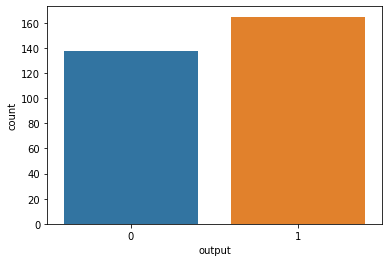

In [11]:
sns.countplot(x=target);

I have 13 features and only two of them has numerical type (chol, age), all other features have categorical type. Let's have a look at numerical variables first. 

# EDA

In [12]:
correlation = data.corr()
correlation = correlation[correlation > 0.25]
mask = np.triu(np.ones_like(correlation, dtype=bool))

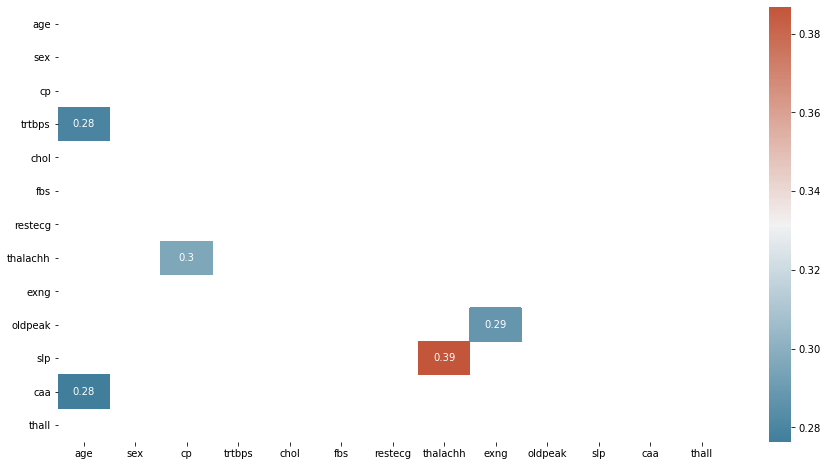

In [13]:
plt.figure(figsize=(15, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, annot=True);

There are some correlations between features but they are not that strong. Most likely I will remove one of the features where correlation is higher that 0.3 

# Numerical data

### chol : cholestoral in mg/dl fetched via BMI sensor (numerical)

In [14]:
chol_feature = df.chol

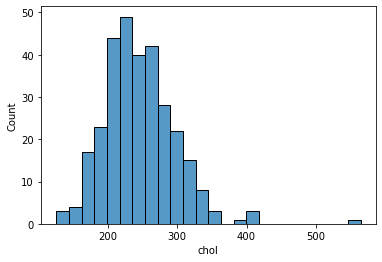

In [15]:
sns.histplot(x=chol_feature);

The variable has normal distribution with some outliers which I am going to analyze next.Outlies I will analyze using IQR

In [16]:
Q1 = chol_feature.quantile(0.25)
Q3 = chol_feature.quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + IQR * 1.5

In [17]:
IQR

63.5

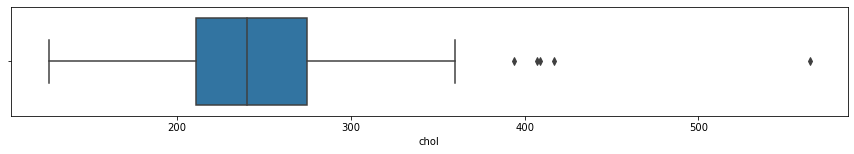

In [18]:
plt.figure(figsize=(15, 2))
sns.boxplot(x=chol_feature);

All outliers are on the right

In [19]:
chol_outliers = chol_feature[chol_feature > upper_bound]
chol_outliers.head()

28     417
85     564
96     394
220    407
246    409
Name: chol, dtype: int64

In [20]:
chol_outliers.shape

(5,)

In [21]:
chol_cleaned = chol_feature[chol_feature < upper_bound]

In [22]:
chol_cleaned.head()

0    233
1    250
2    204
3    236
4    354
Name: chol, dtype: int64

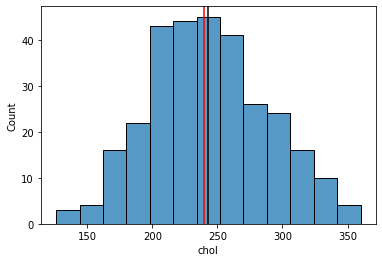

In [23]:
sns.histplot(x=chol_cleaned);
plt.axvline(x=chol_cleaned.median(), color='r');
plt.axvline(x=chol_cleaned.mean(), color='black');

The distribution is bell shaped, median and mean values are very close to each other. So I can assume that now this feature is normally distributed and I can apply different statistical significance tests.

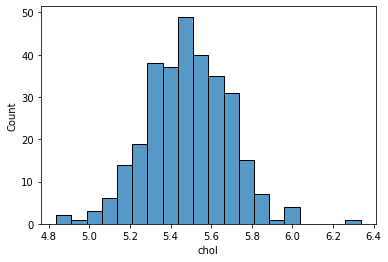

In [24]:
sns.histplot(x=np.log(chol_feature));

### Age : Age of the patient

I think that this it will be more informative if I divide this feature into bins to genralize it, because the certain age won't give the model a lot of information. Age discretization

In [25]:
age_feature = df.age
age_feature.head()

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

In [26]:
age_feature.describe()

count   303.00
mean     54.37
std       9.08
min      29.00
25%      47.50
50%      55.00
75%      61.00
max      77.00
Name: age, dtype: float64

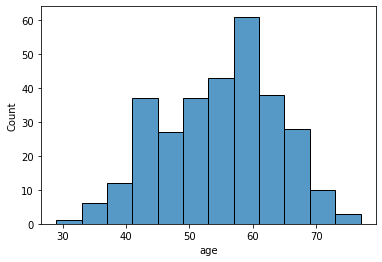

In [27]:
sns.histplot(x=age_feature);

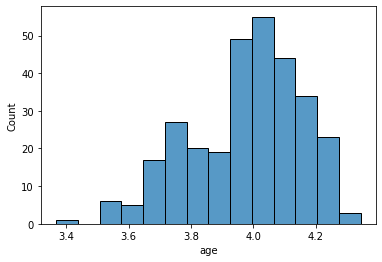

In [28]:
sns.histplot(x=np.log(age_feature));

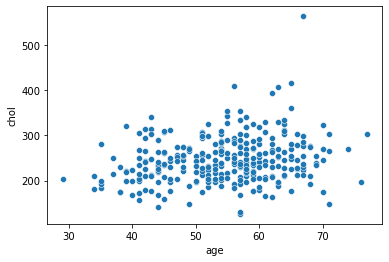

In [31]:
sns.scatterplot(x=df.age, y=df.chol);

There is no correlation between age and chol level.

In [70]:
class AgeDiscretizer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.age_categories = ['age_18', 'age_25', 'age_30', 'age_40', 'age_50', 'age_60']
        self.age_groups = [18, 25, 30, 40, 50, 60]
        self.dependent_feature_to_drop = 'age_1'
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, age_feature):
        
        discretized_data = pd.DataFrame(np.digitize(age_feature, bins=self.age_groups, right=False).astype('str'),
                                       columns=['age'])
        
        encoder = OneHotEncoder()
        discretized_data = pd.DataFrame(encoder.fit_transform(discretized_data).todense(),
                                        columns=self.age_categories[1:])

        return discretized_data

In [71]:
ad = AgeDiscretizer()
ad.fit(age_feature)

AgeDiscretizer()

In [77]:
ad.transform(age_feature).head()

,age_25,age_30,age_40,age_50,age_60
0,0.00,0.00,0.00,0.00,1.00
1,0.00,1.00,0.00,0.00,0.00
2,0.00,0.00,1.00,0.00,0.00
3,0.00,0.00,0.00,1.00,0.00
4,0.00,0.00,0.00,1.00,0.00


In [78]:
age_feature.head()

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

# Categorical data